# **About Dataset**
## Introduction
This datasets about Netflix Movies & TV Shows. Datasets have 12 columns with some null values. To analysis of dataset are used Pandas, plotly.express and Datetime libraries. Analysis process I divided into several parts for step wise analysis and to find out trending questions on social media for Bollywood actors and actress.
### New Section
## **Data Manipulation**
# Missing Data
There are many representations of missing data. They are Null values, missing values. I used some of methods used in data analysis process to clean missing values.

# Data Munging
# String Method
There I used some string method on column such as 'cast', 'Lested_in' to extract data

# Datetime data type
Converting an object type into datatype objects with the to_datetime function then we have a datatime object, can extract various part of data such as year, month and day

# **EDA**
Here, I find out several eye catching question. the following questions are like as:

1-Show the all Movies & TV Shows released by month

2-Count the all types of unique rating & which
rating are with most number

3-Salman, Shah Rukh and Akshay Kumar all movie

4-Find out the Movies & Series have Maximum time length

5-Year on Year show added on Netflix by its type

6-Akshay Kumar all comedies movies, Shah Rukh

7-movies with Kajol and Salman-Akshay Movies

8-Who Director has made the most TV Shows

9-Actors and Actress who have given most Number of Movies

10-Find out which types of genre has most movies and TV Shows

# importing dataset from Kaggle

In [1]:
import os
import json

home_dir = os.path.expanduser("~")
kaggle_dir = os.path.join(home_dir, ".kaggle")
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")

os.makedirs(kaggle_dir, exist_ok=True)

kaggle_credentials = {"username":"tahirazam","key":"5b76ff044a56df536545b584f5abb14b"}

with open(kaggle_json_path, "w") as f:
    json.dump(kaggle_credentials, f)

os.chmod(kaggle_json_path, 0o600)

print("Kaggle API key updated successfully.")

Kaggle API key updated successfully.


In [2]:
!kaggle datasets download -d ankulsharma150/netflix-data-analysis

Dataset URL: https://www.kaggle.com/datasets/ankulsharma150/netflix-data-analysis
License(s): other
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 559MB/s]


In [4]:
# The zip file has already been extracted in the previous step.
# Now, read the extracted file into a pandas DataFrame using the correct filename.
csv_file_name = 'netflix_movies (1).csv'

df = pd.read_csv(csv_file_name)

display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data cleaning

In [6]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
df.shape

(8807, 12)

In [8]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


In [9]:
df = df.dropna(subset=['date_added'])


In [10]:
df['rating'] = df['rating'].fillna('Not Rated')


/tmp/ipython-input-1441684939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna('Not Rated')


In [13]:
# Extract numeric part of duration for movies
movie_durations = df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '').astype(float)

# Calculate median movie duration
movie_median = movie_durations.median()

# Fill missing movie durations with median
df.loc[(df['type'] == 'Movie') & (df['duration'].isna()), 'duration'] = f"{int(movie_median)} min"

# For TV shows, fill missing duration with a placeholder like 'N/A Seasons'
df.loc[(df['type'] == 'TV Show') & (df['duration'].isna()), 'duration'] = 'N/A Seasons'

In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# drop unnecessary columns

---



In [16]:
df = df.drop(columns=['show_id', 'description'])   # drop unnecessary


In [17]:
df.dtypes

,0
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


# converting data types

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  #Convert date_added → datetime


In [19]:
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')


In [20]:
import re

def parse_duration(x):
    if pd.isna(x):
        return (None, None)
    if "Season" in str(x):
        m = re.search(r"(\d+)", x)
        return (None, int(m.group(1)) if m else 1)
    m = re.search(r"(\d+)", x)
    return (int(m.group(1)) if m else None, None)

df[['duration_min','seasons']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))


In [24]:
# Extract year, month, day from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day


In [25]:
df.dtypes

,0
type,category
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,category
duration,object
listed_in,object


In [26]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,duration_min,seasons,year_added,month_added,day_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90.0,NaN,2021.0,9.0,25.0
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",NaN,2.0,2021.0,9.0,24.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN,1.0,2021.0,9.0,24.0
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",NaN,1.0,2021.0,9.0,24.0
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",NaN,2.0,2021.0,9.0,24.0


# **Exploratory Data Analysis (EDA)**

# **Q1- Show the all Movies & TV Shows released by month**

/tmp/ipython-input-2342091204.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df.groupby(['month_added', 'type']).size().reset_index(name='count')


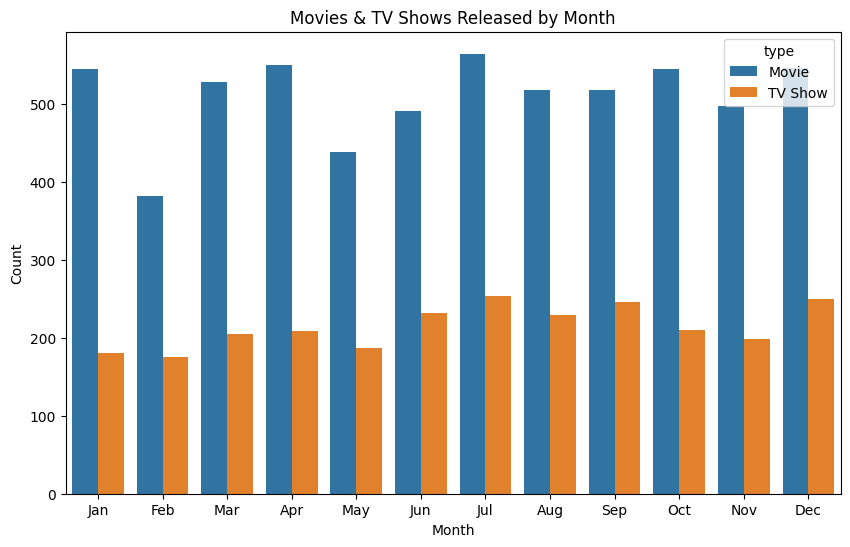

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Movies/TV Shows per month
monthly_counts = df.groupby(['month_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_counts, x='month_added', y='count', hue='type')
plt.title("Movies & TV Shows Released by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(0,12),
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()


# **Q2-Count the all types of unique rating & which rating are with most number**

In [28]:
# Count unique ratings
rating_counts = df['rating'].value_counts()

print("Unique Ratings and their counts:\n", rating_counts)

# Rating with the most number
top_rating = rating_counts.idxmax()
top_count = rating_counts.max()

print(f"\nThe rating with the most titles is '{top_rating}' with {top_count} shows/movies.")


Unique Ratings and their counts:
 rating
TV-MA        3205
TV-14        2157
TV-PG         861
R             799
PG-13         490
TV-Y7         333
TV-Y          306
PG            287
TV-G          220
NR             79
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64

The rating with the most titles is 'TV-MA' with 3205 shows/movies.


/tmp/ipython-input-3958905636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="viridis")


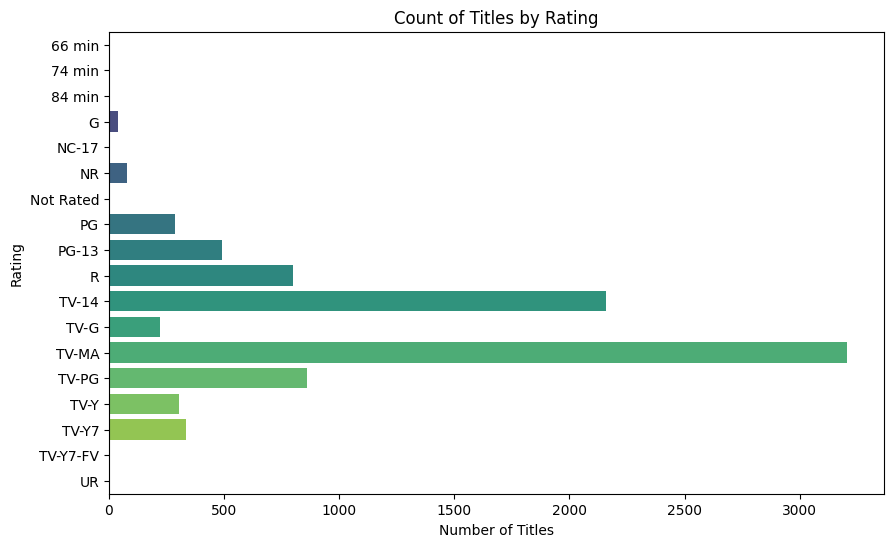

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="viridis")
plt.title("Count of Titles by Rating")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()


# **Q3-Salman, Shah Rukh and Akshay Kumar all movie**

In [30]:
# Filter only Movies
movies = df[df['type'] == 'Movie']

# Salman Khan movies
salman_movies = movies[movies['cast'].str.contains("Salman Khan", na=False)]

# Shah Rukh Khan movies
srk_movies = movies[movies['cast'].str.contains("Shah Rukh Khan", na=False)]

# Akshay Kumar movies
akshay_movies = movies[movies['cast'].str.contains("Akshay Kumar", na=False)]

print("Salman Khan Movies:\n", salman_movies[['title','release_year','rating']])
print("\nShah Rukh Khan Movies:\n", srk_movies[['title','release_year','rating']])
print("\nAkshay Kumar Movies:\n", akshay_movies[['title','release_year','rating']])


Salman Khan Movies:
                                          title  release_year rating
1441                             Hello Brother          1999  TV-14
1674                                 Bodyguard          2011  TV-14
2339                      Prem Ratan Dhan Payo          2015  TV-14
2545                           Andaz Apna Apna          1994  TV-14
2734                        Kuch Kuch Hota Hai          1998  TV-14
2756                                 Paharganj          2019  TV-MA
2957                       Hum Aapke Hain Koun          1994  TV-14
2969                     Together For Eternity          1999   TV-G
4729                     Main aurr Mrs. Khanna          2009  TV-14
5718                           Mumbai Cha Raja          2012  TV-MA
6440                            Chal Mere Bhai          2000  TV-14
7022                      Hum Saath-Saath Hain          1999   TV-G
7109  Jaan-E-Mann: Let's Fall in Love... Again          2006  TV-14
7144                       

# **Q4-Find out the Movies & Series have Maximum time length**

In [31]:
# Longest Movie
longest_movie = df[df['type']=='Movie'].loc[df['duration_min'].idxmax(), ['title','duration_min','release_year']]

# Longest TV Show (by seasons)
longest_tvshow = df[df['type']=='TV Show'].loc[df['seasons'].idxmax(), ['title','seasons','release_year']]

print("Longest Movie on Netflix:\n", longest_movie)
print("\nLongest TV Show on Netflix:\n", longest_tvshow)


Longest Movie on Netflix:
 title           Black Mirror: Bandersnatch
duration_min                         312.0
release_year                          2018
Name: 4253, dtype: object

Longest TV Show on Netflix:
 title           Grey's Anatomy
seasons                   17.0
release_year              2020
Name: 548, dtype: object


/tmp/ipython-input-1049355698.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_min', y='title', data=top_movies, palette="Blues_d")


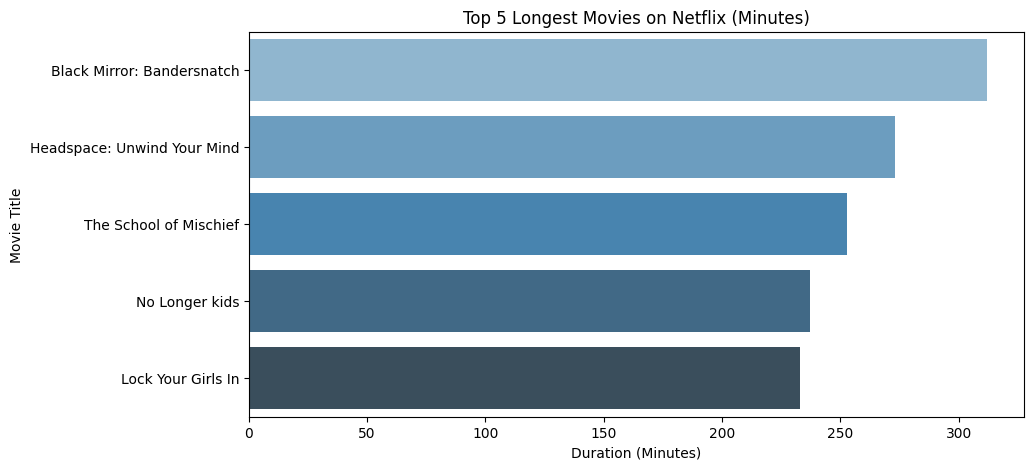

/tmp/ipython-input-1049355698.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seasons', y='title', data=top_tvshows, palette="Greens_d")


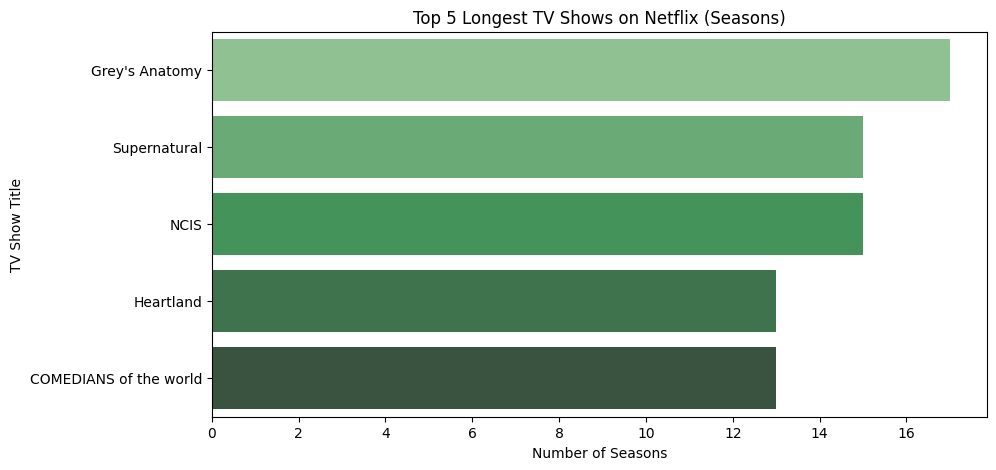

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 longest movies
top_movies = df[df['type']=='Movie'].nlargest(5, 'duration_min')[['title','duration_min']]

# Top 5 longest TV Shows
top_tvshows = df[df['type']=='TV Show'].nlargest(5, 'seasons')[['title','seasons']]

# Plot movies
plt.figure(figsize=(10,5))
sns.barplot(x='duration_min', y='title', data=top_movies, palette="Blues_d")
plt.title("Top 5 Longest Movies on Netflix (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Movie Title")
plt.show()

# Plot TV shows
plt.figure(figsize=(10,5))
sns.barplot(x='seasons', y='title', data=top_tvshows, palette="Greens_d")
plt.title("Top 5 Longest TV Shows on Netflix (Seasons)")
plt.xlabel("Number of Seasons")
plt.ylabel("TV Show Title")
plt.show()


**Q5-Year on Year show added on Netflix by its type**

/tmp/ipython-input-2780588130.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_additions = df.groupby(['year_added', 'type']).size().reset_index(name='count')


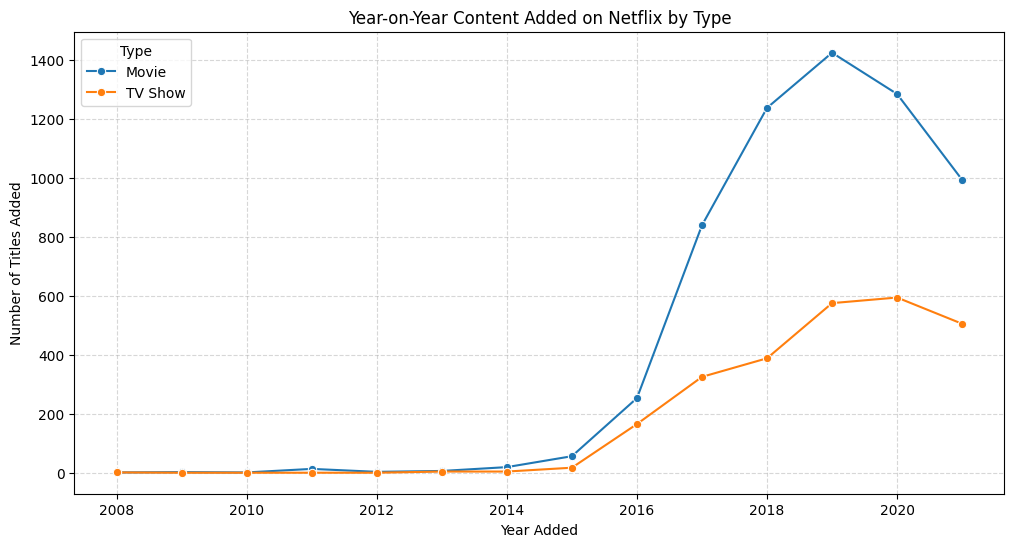

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and type
yearly_additions = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='year_added', y='count', hue='type', marker='o', data=yearly_additions)

plt.title("Year-on-Year Content Added on Netflix by Type")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.legend(title="Type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# **Q6-Akshay Kumar all comedies movies, Shah Rukh movies with Kajol and Salman-Akshay Movies**

In [37]:
akshay_comedy = df[
    (df['cast'].str.contains("Akshay Kumar", na=False)) &
    (df['listed_in'].str.contains("Comedies", na=False)) &
    (df['type'] == "Movie")
]

print("Akshay Kumar Comedy Movies:")
print(akshay_comedy[['title', 'type', 'listed_in']])


Akshay Kumar Comedy Movies:
                      title   type  \
1305   Awara Paagal Deewana  Movie   
1865        Phir Hera Pheri  Movie   
1946                Welcome  Movie   
2268                   Boss  Movie   
2281              Oh My God  Movie   
2544         Action Replayy  Movie   
4694  Toilet: Ek Prem Katha  Movie   
4728                  Joker  Movie   
4733          Rowdy Rathore  Movie   
4736              Thank You  Movie   
4797        Namastey London  Movie   
6296            Bhagam Bhag  Movie   
7524   Mujhse Shaadi Karogi  Movie   
8161         Tees Maar Khan  Movie   
8504          The Shaukeens  Movie   

                                              listed_in  
1305               Action & Adventure, Comedies, Dramas  
1865                     Comedies, International Movies  
1946   Comedies, International Movies, Music & Musicals  
2268               Action & Adventure, Comedies, Dramas  
2281             Comedies, Dramas, International Movies  
2544  Children 

**Shah Rukh movies with Kajol**

In [35]:
srk_kajol = df[
    (df['cast'].str.contains("Shah Rukh Khan", na=False)) &
    (df['cast'].str.contains("Kajol", na=False)) &
    (df['type'] == "Movie")
]

print("Shah Rukh Khan Movies with Kajol:")
print(srk_kajol[['title', 'type', 'listed_in']])


Shah Rukh Khan Movies with Kajol:
                         title   type  \
2731  Kabhi Khushi Kabhie Gham  Movie   
2734        Kuch Kuch Hota Hai  Movie   
5616                   Dilwale  Movie   

                                             listed_in  
2731                      Dramas, International Movies  
2734            Comedies, Dramas, International Movies  
5616  Action & Adventure, Dramas, International Movies  


**Salman–Akshay Movies**

In [36]:
salman_akshay = df[
    (df['cast'].str.contains("Salman Khan", na=False)) &
    (df['cast'].str.contains("Akshay Kumar", na=False)) &
    (df['type'] == "Movie")
]

print("Salman Khan & Akshay Kumar Movies:")
print(salman_akshay[['title', 'type', 'listed_in']])


Salman Khan & Akshay Kumar Movies:
                                         title   type  \
7109  Jaan-E-Mann: Let's Fall in Love... Again  Movie   
7524                      Mujhse Shaadi Karogi  Movie   

                                            listed_in  
7109    Dramas, International Movies, Romantic Movies  
7524  Comedies, International Movies, Romantic Movies  


# **Q7-Who Director has made the most TV Shows**

/tmp/ipython-input-2788122026.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='director', data=top10_directors, palette="viridis")


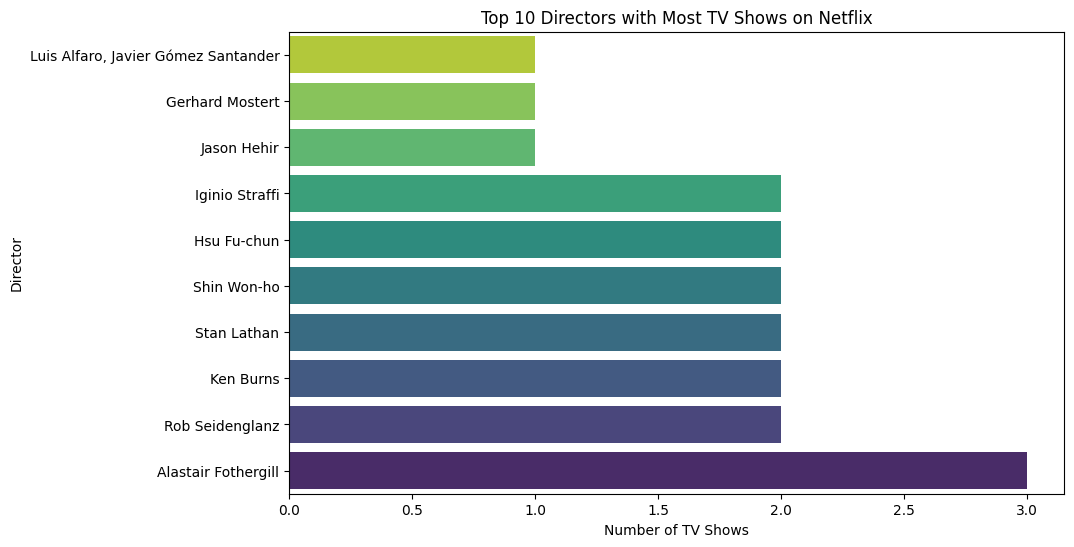

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for TV shows
tv_shows = df[df['type'] == 'TV Show']

# Count TV shows per director
director_tv_counts = tv_shows['director'].value_counts().reset_index(name='count')
director_tv_counts.rename(columns={'index': 'director'}, inplace=True)

# Exclude 'Unknown' director
director_tv_counts = director_tv_counts[director_tv_counts['director'] != 'Unknown']

# Get the top 10 directors
top10_directors = director_tv_counts.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='director', data=top10_directors, palette="viridis")
plt.xlabel("Number of TV Shows")
plt.ylabel("Director")
plt.title("Top 10 Directors with Most TV Shows on Netflix")
plt.gca().invert_yaxis()
plt.show()

# **Q8-Actors and Actress who have given most Number of Movies**

In [41]:
# Filter for movies
movies_df = df[df['type'] == 'Movie'].copy()

# Split the 'cast' string into individual names and explode the DataFrame
movies_df['cast'] = movies_df['cast'].str.split(', ')
cast_counts = movies_df.explode('cast')['cast'].value_counts()

# Exclude 'Unknown' cast
cast_counts = cast_counts[cast_counts.index != 'Unknown']

# Display the top 10 actors/actresses with the most movies
print("Top 10 Actors/Actresses with the Most Movies on Netflix:")
print(cast_counts.head(10))

Top 10 Actors/Actresses with the Most Movies on Netflix:
cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Paresh Rawal        28
Julie Tejwani       28
Rupa Bhimani        27
Boman Irani         27
Name: count, dtype: int64


/tmp/ipython-input-2962965498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cast_counts.head(10).values, y=cast_counts.head(10).index, palette='viridis')


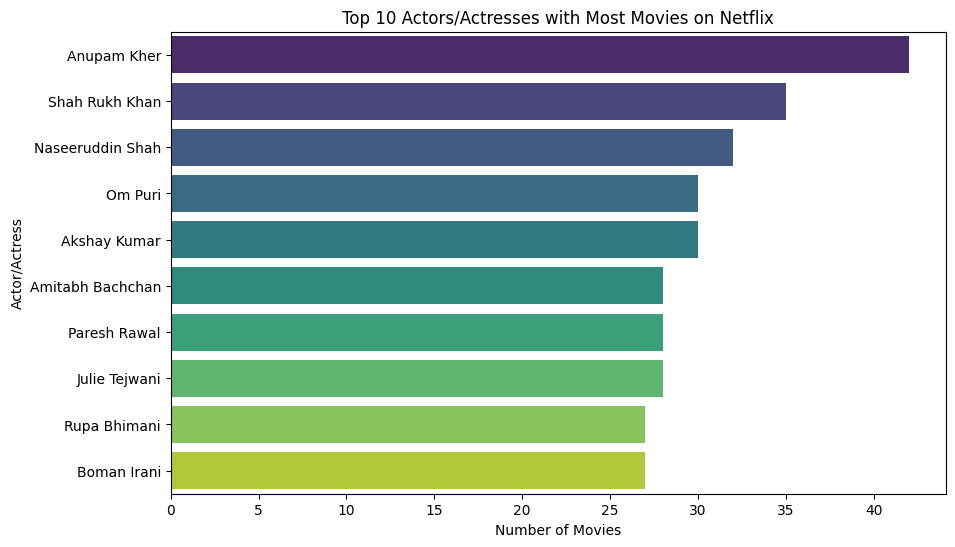

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 actors/actresses
plt.figure(figsize=(10, 6))
sns.barplot(x=cast_counts.head(10).values, y=cast_counts.head(10).index, palette='viridis')
plt.title("Top 10 Actors/Actresses with Most Movies on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Actor/Actress")
plt.show()

# **Q9-Find out which types of genre has most movies and TV Shows**

In [46]:
# Split the 'listed_in' column and count genres for both movies and TV shows
genres_df = df.copy()
genres_df['listed_in'] = genres_df['listed_in'].str.split(', ')
genre_counts = genres_df.explode('listed_in')['listed_in'].value_counts()

# Display the top 10 genres
print("Top 10 Genres with the Most Titles on Netflix:")
print(genre_counts.head(10))

Top 10 Genres with the Most Titles on Netflix:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


/tmp/ipython-input-41048527.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')


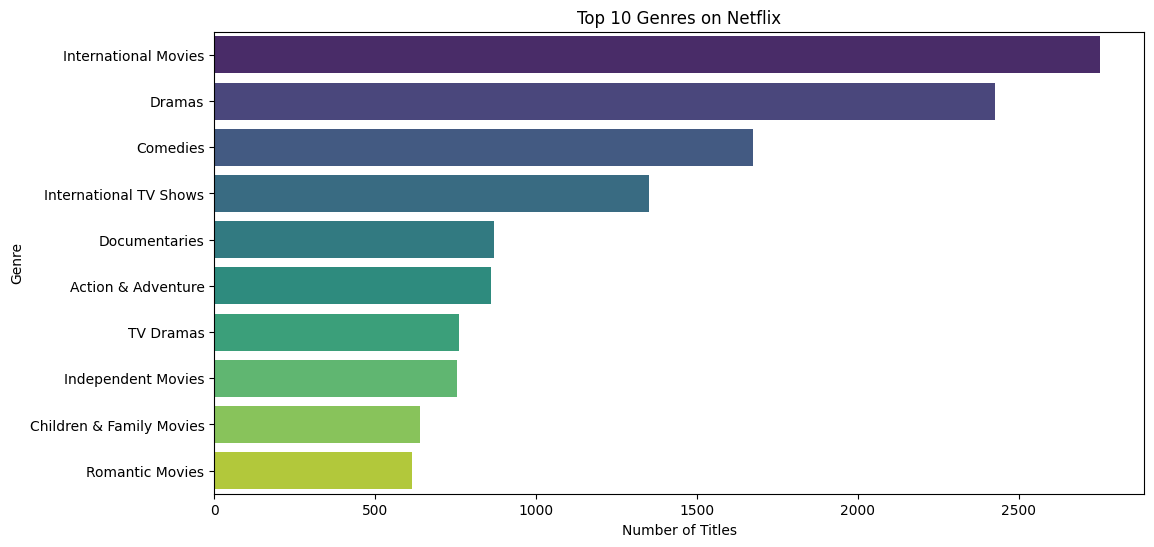

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()